# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

pymaceuticals_df = pd.merge(study_results, mouse_metadata, on = ["Mouse ID"])
# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
count = pymaceuticals_df["Mouse ID"].value_counts()
count

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pymaceuticals_df.duplicated(subset = "Mouse ID", keep = "first")

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [77]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_df.drop_duplicates(subset="Mouse ID")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [5]:
# Checking the number of mice in the clean DataFrame.
count = pymaceuticals_df["Mouse ID"].value_counts()
count

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

## Summary Statistics

In [6]:
regiment_df = pymaceuticals_df.groupby(["Drug Regimen"])
drug_regiment = regiment_df["Drug Regimen"]
mean_tumor_volume = regiment_df["Tumor Volume (mm3)"].mean()
median_tumor_volume = regiment_df["Tumor Volume (mm3)"].median()
tumor_volume_variance = regiment_df["Tumor Volume (mm3)"].var()
tumor_volume_deviation = regiment_df["Tumor Volume (mm3)"].std()
tumor_volumne_error = regiment_df["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,
                           "Median Tumor Volume": median_tumor_volume,
                           "Tumor Volume Variance": tumor_volume_variance,
                           "Tumor Volume Std. Dev": tumor_volume_deviation,
                           "Tumor Volume Stf. Err.": tumor_volumne_error})
#summary_df.set_index("Drug Regimen")
summary_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Stf. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
agg_summary_df = pymaceuticals_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var', 'std', 'sem'])
agg_summary_df.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

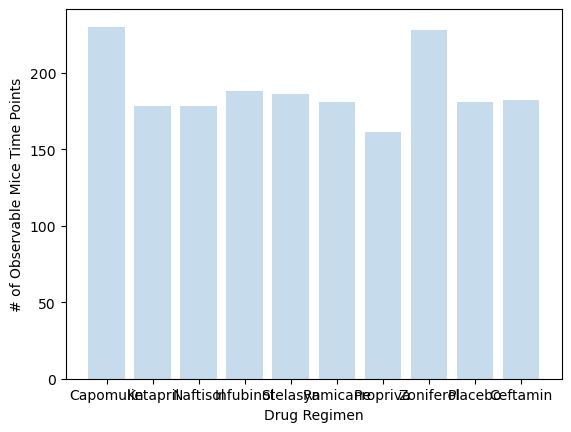

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_names = pymaceuticals_df['Drug Regimen'].unique()

# Create a list indicating where to write labels and set figure size
x_axis = drug_names
y_axis = pymaceuticals_df.groupby(['Drug Regimen']).count()['Mouse ID']


plt.xlabel('Drug Regimen')
plt.ylabel('# of Observable Mice Time Points')

plt.bar(x_axis, y_axis, alpha = 0.25)

plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (249, 2) + inhomogeneous part.

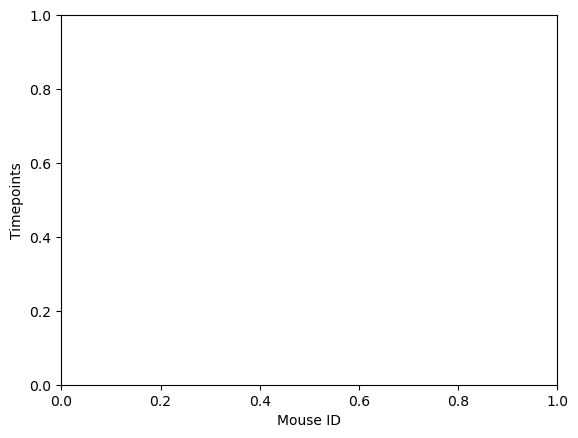

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


# Create a list indicating where to write labels and set figure size
x_axis = pymaceuticals_df.groupby(['Mouse ID'])
y_axis = pymaceuticals_df.groupby(['Timepoint']).count()['Mouse ID']


plt.xlabel('Mouse ID')
plt.ylabel('Timepoints')

plt.bar(x_axis, y_axis)

plt.show()

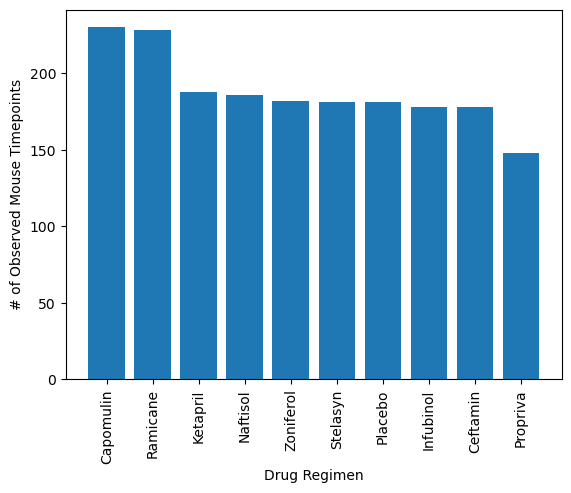

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


Sex
Male      958
Female    935
Name: count, dtype: int64


<Axes: ylabel='count'>

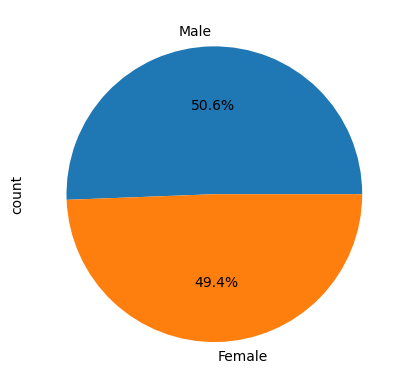

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_v_male = pymaceuticals_df['Sex'].value_counts()
print(female_v_male)

female_v_male.plot(kind='pie',y='', autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1fa51967290>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

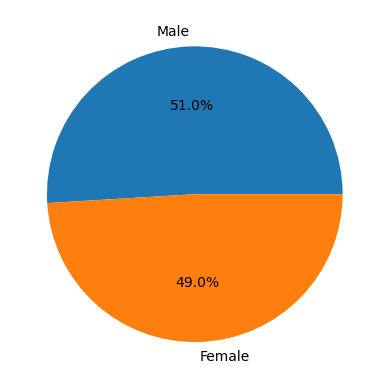

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male' , 'Female'
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = pymaceuticals_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = greatest_timepoint_df.merge(pymaceuticals_df,on=['Mouse ID','Timepoint'], how='left')
print(final_tumor_df.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a203         45           67.973419                 2    Infubinol   
1     a251         45           65.525743                 1    Infubinol   
2     a262         45           70.717621                 4      Placebo   
3     a275         45           62.999356                 3     Ceftamin   
4     a366         30           63.440686                 1     Stelasyn   

      Sex  Age_months  Weight (g)  
0  Female          20          23  
1  Female          21          25  
2  Female          17          29  
3  Female          20          28  
4  Female          16          29  


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


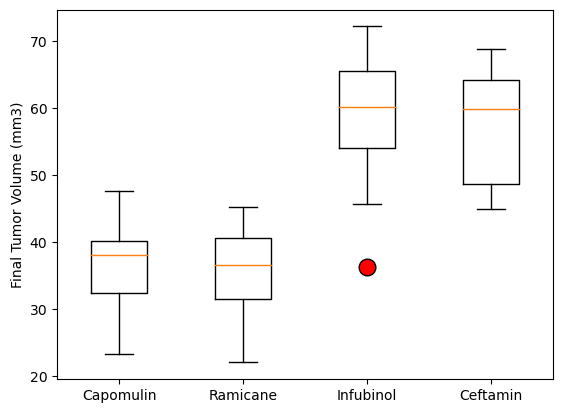

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

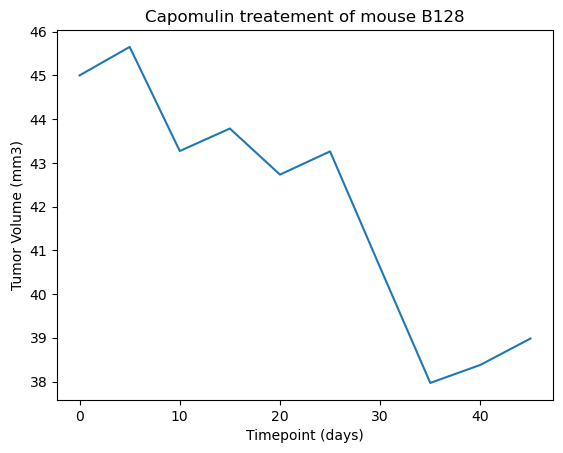

In [47]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_treated = pymaceuticals_df[pymaceuticals_df['Drug Regimen']== 'Capomulin']

mouse = capomulin_treated.loc[capomulin_treated['Mouse ID'] == 'b128']

# Create the X and Y axis list
timepoints = [0,10,20,30,40]

# Set the chart labels
plt.title('Capomulin treatement of mouse B128')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')

plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'])

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = capomulin_treated.groupby(['Mouse ID','Sex'])['Weight (g)']
average_capomulin_regimen = capomulin_regimen.mean()
weight = capomulin_regimen.groupby(['Mouse ID'])['Weight (g)'].value_counts()

plt.scatter(weight.values,average_capomulin_regimen.values)

plt.ylabel('Average tumor volume (mm3)')
plt.xlabel('Weight (g)')

plt.show()

AttributeError: 'SeriesGroupBy' object has no attribute 'groupby'

## Correlation and Regression

In [53]:
# Calculate the correlation coefficient and a linear regression model 
print("The correlation between mouse weight and the average tumor volume is 0.84")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(weight.values,average_capomulin_regimen.values)

plt.ylabel('Average tumor volume (mm3)')
plt.xlabel('Weight (g)')

plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


NameError: name 'weight' is not defined